In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("movie_metadata.csv")

# Show first 5 rows
print(df.head())

# Check columns
print(df.columns)

# Check missing values
print(df.isnull().sum())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [2]:
# Drop duplicates
df = df.drop_duplicates()

# Keep useful columns
df = df[['movie_title', 'genres', 'imdb_score']]

# Drop rows with missing ratings
df = df.dropna(subset=['imdb_score'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 5042
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  4998 non-null   object 
 1   genres       4998 non-null   object 
 2   imdb_score   4998 non-null   float64
dtypes: float64(1), object(2)
memory usage: 156.2+ KB
None


In [3]:
print("Mean Rating:", df['imdb_score'].mean())
print("Median Rating:", df['imdb_score'].median())
print("Mode Rating:", df['imdb_score'].mode()[0])



Mean Rating: 6.441056422569028
Median Rating: 6.6
Mode Rating: 6.7


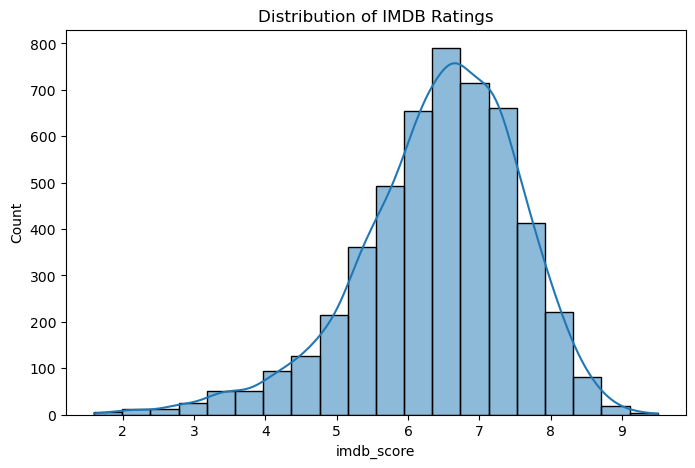

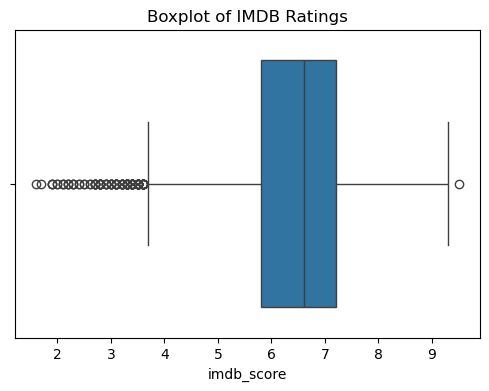

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['imdb_score'])
plt.title("Boxplot of IMDB Ratings")
plt.show()



In [5]:
# Top 10 Movies
print(df[['movie_title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10))

# Split multiple genres
df['main_genre'] = df['genres'].str.split('|').str[0]

# Top Genres
genre_ratings = df.groupby('main_genre')['imdb_score'].mean().sort_values(ascending=False)
print(genre_ratings.head(10))


                        movie_title  imdb_score
2765  Towering Inferno                      9.5
1937      The Shawshank Redemption          9.3
3466                 The Godfather          9.2
3207           Dekalog                      9.1
2824           Dekalog                      9.1
4409          Kickboxer: Vengeance          9.1
66                 The Dark Knight          9.0
3481             Fargo                      9.0
2837        The Godfather: Part II          9.0
1874              Schindler's List          8.9
main_genre
Film-Noir      7.600000
History        7.500000
Music          7.200000
Documentary    7.167857
Biography      7.158964
Crime          6.903746
Drama          6.765208
Animation      6.631148
Western        6.583333
Mystery        6.551515
Name: imdb_score, dtype: float64
